<a href="https://colab.research.google.com/github/Roms-tripleten/megaline_da_82/blob/main/notebooks/Analisis_Megaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis estadístico para detectar patrones y outliers IV 🐍🖥️✍️

## Objetivos académicos

- Mostrar ejemplo de resumen estadístico para el dataset *EverPeak*
- Cargar nuestro reporte a Github

## Analisis de datos de Megaline

---

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Vamos analizar por separado los consumos de llamdas, mensajes SMS y Gigabits para entender el comportamiento de los usuarios en cada servicio.



### Descripción de las tarifas

Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.



### Descripción de los datos

**Instrucciones**

*En esta sección haz la descripción general de los datos, cantidad de registros, cantidad de columnas. Discute sobre la calidad de los datos y la necesidad de limpieza. Describe cómo los datos se relacionan entre si*

**Descripción de datos**

* `Calls`: Se tienen 137,375 observaciones con 4 columnas,(...). Con respecto a necesidades de la limpieza se nota que:
  * Es necesario que el campo `date_call` este formato fecha
  * Ajustar los consumos al entero próximo
  * No observan datos nulos

* `Internet`: Se tienen 104,805 observaciones con 4 columnas,(...). Con respecto a necesidades de la limpieza se nota que:
  * Es necesario que el campo `date_session` este formato fecha
  * No observan datos nulos

* `Users`: Se tienen 500 observaciones con 8 columnas,(...). Con respecto a necesidades de la limpieza se nota que:
  * Es necesario que el campo `date_session` este formato fecha
  * Hay valores perdidos en la columna `churn_date` ...
  * La columna `city` contiene la ciudad y el estado se considera que puede ser útil dividirla


#### Código de referencia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [ ]:
megaline_calls = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_users.csv')



In [ ]:
print(megaline_users.info())
megaline_users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaN
405,1405,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,ultimate,NaN
396,1396,Ardelia,Benton,65,"Salt Lake City, UT MSA",2018-06-01,surf,NaN
13,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaN
290,1290,Thaddeus,Compton,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-14,surf,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaN


### Limpieza de datos

**Instrucciones**

*Describe el tratamiento de limpieza para los datos, discute nulos, duplicados, necesidad de preparación para el análisis*

> 💡 Haz las trasformaciones necesarias relativas al consumo, redondeo y transformaciones

#### Users

In [ ]:
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [ ]:

megaline_users['reg_month_year'] = pd.to_datetime(megaline_users['reg_date'],errors='coerce').dt.strftime("%Y-%m")
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'],errors='coerce')

In [ ]:
#Extraer ciudad y estado
megaline_users['state'] = megaline_users['city'].str.split(',').str[1]
megaline_users['city'] = megaline_users['city'].str.split(',').str[0]

In [ ]:
megaline_users.drop(columns=['churn_date'],inplace=True)

In [ ]:
print(megaline_users.info())
megaline_users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         500 non-null    int64         
 1   first_name      500 non-null    object        
 2   last_name       500 non-null    object        
 3   age             500 non-null    int64         
 4   city            500 non-null    object        
 5   reg_date        500 non-null    datetime64[ns]
 6   plan            500 non-null    object        
 7   reg_month_year  500 non-null    object        
 8   state           500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 35.3+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,reg_month_year,state
164,1164,Kam,Macias,31,Chicago-Naperville-Elgin,2018-02-17,ultimate,2018-02,IL-IN-WI MSA
330,1330,Tobi,Kinney,48,Las Vegas-Henderson-Paradise,2018-11-06,ultimate,2018-11,NV MSA
196,1196,Noel,Dawson,46,Los Angeles-Long Beach-Anaheim,2018-01-14,ultimate,2018-01,CA MSA
87,1087,Lenard,Atkinson,45,Washington-Arlington-Alexandria,2018-11-18,surf,2018-11,DC-VA-MD-WV MSA
24,1024,Yuki,Tyson,74,New York-Newark-Jersey City,2018-08-21,surf,2018-08,NY-NJ-PA MSA


#### Planes

In [ ]:
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Mensajes SMS

In [ ]:
megaline_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


#### Internet

In [ ]:
megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [ ]:
megaline_internet['session_month_year'] = pd.to_datetime(megaline_internet['session_date'],errors='coerce').dt.strftime("%Y-%m")
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'],errors='coerce')

In [ ]:
print(megaline_internet.info())
megaline_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  104825 non-null  object        
 1   user_id             104825 non-null  int64         
 2   session_date        104825 non-null  datetime64[ns]
 3   mb_used             104825 non-null  float64       
 4   session_month_year  104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB
None


,id,user_id,session_date,mb_used,session_month_year
570,1004_188,1004,2018-05-31,335.65,2018-05
63648,1292_352,1292,2018-09-11,938.82,2018-09
91027,1418_291,1418,2018-09-21,377.29,2018-09
20019,1090_253,1090,2018-11-05,0.00,2018-11
69653,1325_55,1325,2018-12-11,0.00,2018-12


#### Llamadas

In [ ]:
megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [ ]:
# Redondear minutos hacia arriba
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])

In [ ]:
megaline_calls['call_month_year'] = pd.to_datetime(megaline_calls['call_date'],errors='coerce').dt.strftime("%Y-%m")
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'],errors='coerce')

In [ ]:
print(megaline_calls.info())
megaline_calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               137735 non-null  object        
 1   user_id          137735 non-null  int64         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float64       
 4   call_month_year  137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB
None


,id,user_id,call_date,duration,call_month_year
109033,1385_103,1385,2018-06-18,5.0,2018-06
39046,1145_293,1145,2018-12-18,0.0,2018-12
40019,1147_852,1147,2018-11-19,9.0,2018-11
96636,1345_46,1345,2018-11-03,12.0,2018-11
44708,1161_166,1161,2018-12-14,11.0,2018-12


#### Código de referencia

In [ ]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Descartar nulos
megaline_internet.dropna(inplace=True)

In [ ]:
#Limpieza de duplicados
megaline_users.drop_duplicates(inplace=True)

In [ ]:
megaline_users.drop(columns=['churn_date'],inplace=True)

In [ ]:
#Extraer ciudad y estado
megaline_users['state'] = megaline_users['city'].str.split(',').str[1]
megaline_users['city'] = megaline_users['city'].str.split(',').str[0]

In [ ]:
# Extraer año-mes

megaline_messages['message_month_year'] = pd.to_datetime(megaline_messages['message_date'],errors='coerce').dt.strftime("%Y-%m")

In [ ]:
# Redondear minutos hacia arriba
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])


### Agrupación por consumo mes-usuario y análisis estadístico

**Instrucciones**

*Agrupa los datos por consumo por mes-usuarios. Analiza la distribución del consumo mes-usuario, describe los estadístico y la forma de la distribución. Determina comportamientos atípicos y discute el tratamiento que le darás*

#### Mensajes

#### Llamadas

In [ ]:
calls_month_user= megaline_calls.groupby(['call_month_year','user_id'])['duration'].sum().reset_index(name='total_minutes')
calls_month_user

,call_month_year,user_id,total_minutes
0,2018-01,1042,114.0
1,2018-01,1077,290.0
2,2018-01,1185,181.0
3,2018-01,1196,287.0
4,2018-01,1214,16.0
...,...,...,...
2253,2018-12,1495,492.0
2254,2018-12,1496,294.0
2255,2018-12,1497,300.0
2256,2018-12,1498,339.0


In [ ]:
calls_month_user.query("user_id == 1042")

,call_month_year,user_id,total_minutes
0,2018-01,1042,114.0
6,2018-02,1042,254.0
24,2018-03,1042,214.0
59,2018-04,1042,279.0
133,2018-05,1042,489.0
240,2018-06,1042,372.0
385,2018-07,1042,374.0
569,2018-08,1042,358.0
797,2018-09,1042,252.0
1080,2018-10,1042,281.0


In [ ]:
calls_month_user['total_minutes'].describe()

,total_minutes
count,2258.000000
mean,435.937555
std,231.972343
min,0.000000
25%,275.000000
50%,429.000000
75%,574.750000
max,1510.000000


Text(0.5, 1.0, 'Distribución del minutos mensuales consumidos por usuarios')

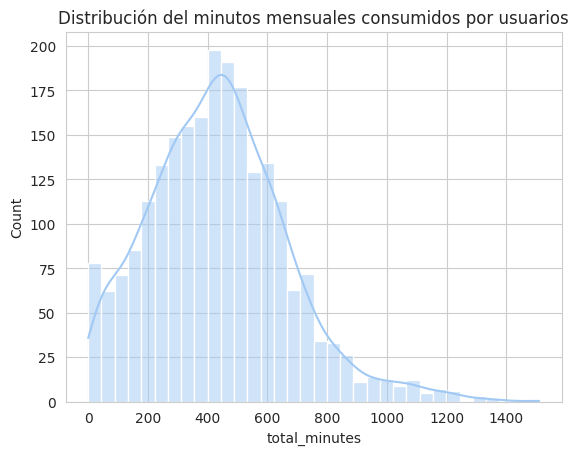

In [ ]:
sns.histplot(data=calls_month_user,x='total_minutes',kde=True)
plt.title("Distribución del minutos mensuales consumidos por usuarios")

Text(0.5, 1.0, 'Distribución del minutos mensuales consumidos por usuarios')

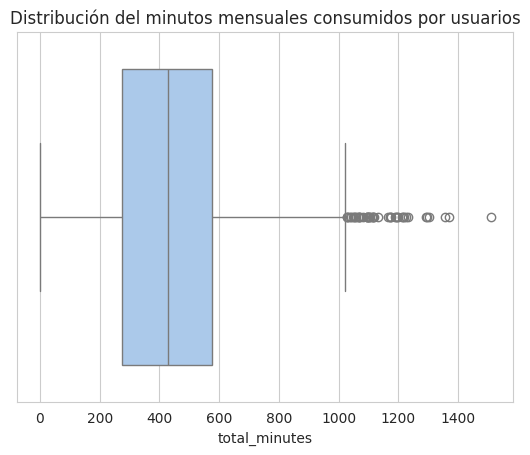

In [ ]:
sns.boxplot(data=calls_month_user,x='total_minutes')
plt.title("Distribución del minutos mensuales consumidos por usuarios")

In [ ]:
#Identificación por IQR
def outlier_iqr(x,q1,q3):
    iqr=q3-q1
    return not((q1-1.5*iqr)<x<(q3+1.5*iqr))

q1=calls_month_user['total_minutes'].quantile(0.25)
q3=calls_month_user['total_minutes'].quantile(0.75)
calls_month_user['minutes_outlier_iqr']= calls_month_user['total_minutes'].apply(outlier_iqr,q1=q1,q3=q3)

In [ ]:
calls_month_user=calls_month_user.query("minutes_outlier_iqr==False")

In [ ]:
calls_month_user

,call_month_year,user_id,total_minutes,minutes_outlier_iqr
0,2018-01,1042,114.0,False
1,2018-01,1077,290.0,False
2,2018-01,1185,181.0,False
3,2018-01,1196,287.0,False
4,2018-01,1214,16.0,False
...,...,...,...,...
2253,2018-12,1495,492.0,False
2254,2018-12,1496,294.0,False
2255,2018-12,1497,300.0,False
2256,2018-12,1498,339.0,False


In [ ]:
calls_month_user["minutes_outlier_iqr"].sum()

np.int64(45)

#### Internet

#### Código de referencia

In [ ]:
megaline_messages_by_month_user=megaline_messages.groupby(['message_month_year','user_id'])['user_id'].count().reset_index(name='messages')

In [ ]:
megaline_messages_by_month_user['messages'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
messages,1806.0,42.110188,33.122931,1.0,17.0,34.0,59.0,266.0


Text(0.5, 1.0, 'Distribución de envio de mensajes por usuario mensualmente')

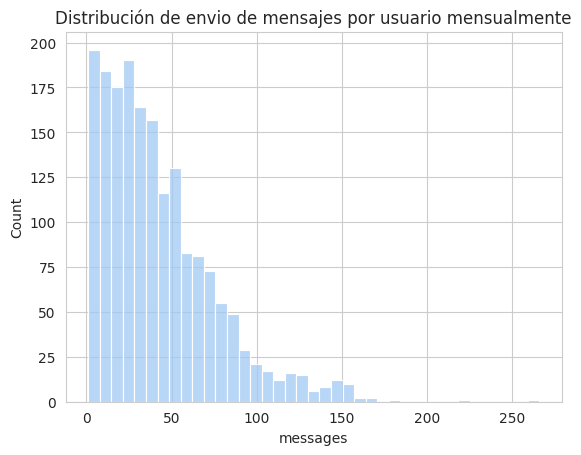

In [ ]:
sns.histplot(data=megaline_messages_by_month_user,x='messages')
plt.title('Distribución de envio de mensajes por usuario mensualmente')

Text(0.5, 1.0, 'Distribución de envio de mensajes por usuario mensualmente')

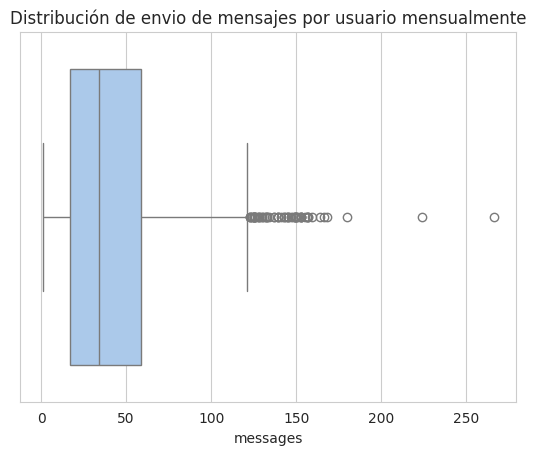

In [ ]:
sns.boxplot(data=megaline_messages_by_month_user,x='messages')
plt.title('Distribución de envio de mensajes por usuario mensualmente')

In [ ]:
#Identificación por IQR
def outlier_iqr(x,q1,q3):
    iqr=q3-q1
    return not((q1-1.5*iqr)<x<(q3+1.5*iqr))

q1=megaline_messages_by_month_user['messages'].quantile(0.25)
q3=megaline_messages_by_month_user['messages'].quantile(0.75)
megaline_messages_by_month_user['messages_outlier_iqr']= megaline_messages_by_month_user['messages'].apply(outlier_iqr,q1=q1,q3=q3)

In [ ]:
megaline_messages_by_month_user['messages_outlier_iqr'].sum()

np.int64(61)

In [ ]:
# Drop
megaline_messages_by_month_user_drop_outliers= megaline_messages_by_month_user[megaline_messages_by_month_user['messages_outlier_iqr']]

In [ ]:
# Winsorize
lower= megaline_messages_by_month_user['messages'].min()
upper= megaline_messages_by_month_user['messages'].quantile(0.99)
megaline_messages_by_month_user['messages_winsorize']=np.clip(megaline_messages_by_month_user['messages'],lower,upper)

In [ ]:
# Agrupación por consumo internet y ajuste de usuarios
megaline_internet['session_month_year'] = pd.to_datetime(megaline_internet['session_date'],errors='coerce').dt.strftime("%Y-%m")
internet_user_month=megaline_internet.groupby(['session_month_year','user_id'])['mb_used'].sum().reset_index(name='mbs_used')
internet_user_month['gbs_user']=np.ceil(internet_user_month['mbs_used']/1024)
internet_user_month

,session_month_year,user_id,mbs_used,gbs_user
0,2018-01,1042,1854.93,2.0
1,2018-01,1077,10635.64,11.0
2,2018-01,1185,6812.77,7.0
3,2018-01,1196,8908.61,9.0
4,2018-01,1214,1315.35,2.0
...,...,...,...,...
2272,2018-12,1495,24097.40,24.0
2273,2018-12,1496,16438.99,17.0
2274,2018-12,1497,11106.55,11.0
2275,2018-12,1498,23137.69,23.0


### Segmentación de usuarios

**Instrucciones**

Por cada `plan` muestra :

* Consumo  promedio de Gbs por mes/usuario
* Cantidad promedio de mensajes por mes/usuario
* Cantidad de minutos de llamadas por mes/usuario

- Discute si encuentras alguna diferencia en el consumo entre los usuarios de cada plan


Por cada `ciudad` muestra :

* Consumo  promedio de Gbs por mes/usuario
* Cantidad promedio de mensajes por mes/usuario
* Cantidad de minutos de llamadas por mes/usuario

- Discute si encuentras alguna diferencia en el consumo entre los usuarios de cada ciudad


In [ ]:
megaline_users[['user_id','plan','city']].head()

,user_id,plan,city
0,1000,ultimate,Atlanta-Sandy Springs-Roswell
1,1001,surf,Seattle-Tacoma-Bellevue
2,1002,surf,Las Vegas-Henderson-Paradise
3,1003,surf,Tulsa
4,1004,surf,Seattle-Tacoma-Bellevue


In [ ]:
calls_month_user_plan_city= calls_month_user.merge(megaline_users[['user_id','plan','city']])
calls_month_user_plan_city

,call_month_year,user_id,total_minutes,minutes_outlier_iqr,plan,city
0,2018-01,1042,114.0,False,surf,Philadelphia-Camden-Wilmington
1,2018-01,1077,290.0,False,ultimate,Charlotte-Concord-Gastonia
2,2018-01,1185,181.0,False,ultimate,Louisville/Jefferson County
3,2018-01,1196,287.0,False,ultimate,Los Angeles-Long Beach-Anaheim
4,2018-01,1214,16.0,False,ultimate,San Francisco-Oakland-Berkeley
...,...,...,...,...,...,...
2208,2018-12,1495,492.0,False,surf,New York-Newark-Jersey City
2209,2018-12,1496,294.0,False,surf,New Orleans-Metairie
2210,2018-12,1497,300.0,False,ultimate,Los Angeles-Long Beach-Anaheim
2211,2018-12,1498,339.0,False,surf,New York-Newark-Jersey City


In [ ]:
calls_month_user_plan_city.groupby(['plan'])['total_minutes'].mean().reset_index(name='total_minutes_avg').round(2)

,plan,total_minutes_avg
0,surf,423.16
1,ultimate,417.67


Text(0.5, 1.0, 'Consumo de minutos por plan')

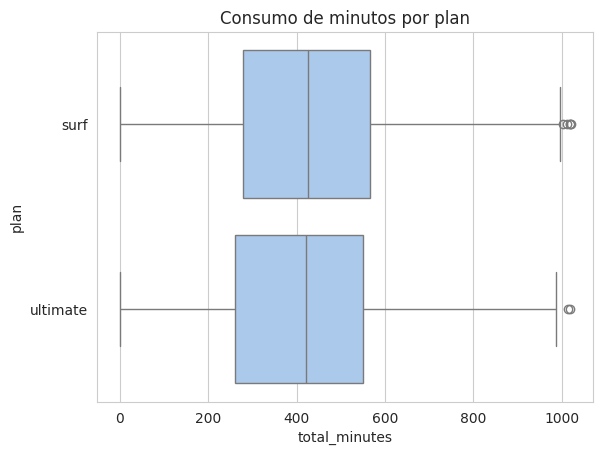

In [ ]:
sns.boxplot(data=calls_month_user_plan_city,x='total_minutes',y='plan')
plt.title('Consumo de minutos por plan')

#### Código de referencia

In [ ]:
# Gbs Mensual por plan
internet_plan_month=internet_user_month.merge(megaline_users[['user_id','plan']])
internet_plan_month.groupby(['plan'])['gbs_user'].mean().reset_index(name='gbs_avg').round(2)

,plan,gbs_avg
0,surf,16.83
1,ultimate,17.33


Text(0.5, 1.0, 'Distribución de consumo de Gigas por p´lan')

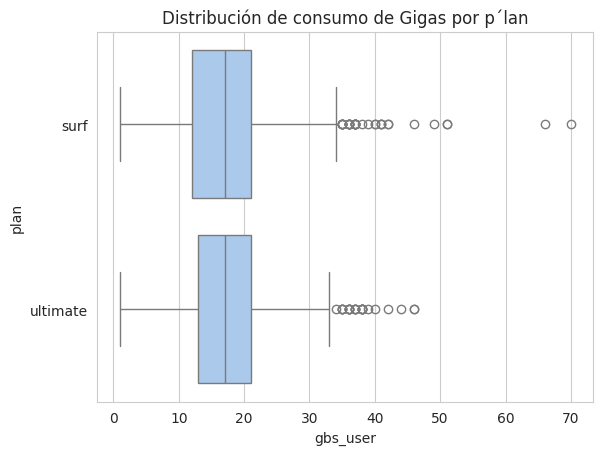

In [ ]:
sns.boxplot(data=internet_plan_month, x='gbs_user',y='plan')
plt.title('Distribución de consumo de Gigas por p´lan')

### Facturación (*opcional*)

**Instrucciones**

- Estima la facturación mensual por usuario según el plan contratado y su consumo mensual
- Analiza si encuentras alguna diferencia en la facturación de los sus usuarios con respecto al plan contratado

### Compartir resultados

**Instrucciones**

*Carga tu reporte en GitHub, incluye en el repositorio un archivo README donde describas el objetivo del estudio*

## 🚀 Para seguir aprendiendo :

---

- 📚 Vuelve a revisar este notebook y trata resolver por tu cuenta  nuevamente
- 💬 Recuerda que en Discord puedes dejar todos tus comentarios y dudas sobre el contenido del sprint en [`Discord`](https://discord.com/channels/1081207584104656986/1420849538196836472).
    - 📝 Si tienes preguntas sobre tu proyecto, usa el canal [`#project`](https://discord.com/channels/1081207584104656986/1420848813186351134) para recibir ayuda y compartir ideas.
    - 🤝 Aprovecha el espacio de `CoLearning` para aclarar tus dudas junto con otros estudiantes e instructores: [Co-Learning](https://discord.com/channels/1081207584104656986/1197953851391746119).
    - En tus preguntas recuerda etiquetar a `@Dataconsulta` y ubica tu pregunta de acuerdo a `Sprint/Capitulo/Seccion`
- 📅 ¿Necesitas ayuda personalizada? Puedes agendar una sesión `1:1` conmigo aquí: [1:1 Roman Castillo](https://scheduler.zoom.us/roman-castillo/1-1-roman-castillo).

- Por último hazme paro y responde la encuesta al final de la sesión, me sirve para poder ayudarte mejor

¡Sigue practicando y no dudes en pedir apoyo cuando lo necesites! 💪✨